In [18]:
def get_url(url):
    import requests
    import re
    url_list = []
    url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485?fr=aladdin'
    headers = {
            'user-agent':'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'
        }
    response = requests.get(url,headers = headers)
    pattern = re.compile(r'<a target=_blank href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93.*?%E7%BA%BF/?\d*?"')
    my_url = pattern.findall(response.text)
    for u in my_url:    
        u1 = u.split()[2].split('=')[1].split('"')[1]
        u2 = ('https://baike.baidu.com' + u1)
        url_list.append(u2)
    return url_list

In [19]:
import re
import requests
from collections import defaultdict
url_list = set(get_url(url))
for sub_url in url_list:
    url = sub_url
    headers = {
            'user-agent':'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'
        }
    response = requests.get(url,headers = headers).content.decode('utf-8')
    pattern = re.compile(r'<a target=_blank href="/item/.*%E7%AB%99/?\d*')
    my_url = pattern.findall(response)

# 不好意思，实在是写不下去了，无法用正则表达式匹配出每条线的地铁站点，感觉没用的站点太多了……下面重来

In [71]:
import requests
import re
url = "http://map.baidu.com/?qt=bsi&c=131"
response = requests.get(url)
text = response.json()['content']
#用defaultdict()的作用是，当key不存在时，可以返回一个list,int,或者0，不至于报错
station_geo = defaultdict(list) #存取每条地铁线的所有路过站点的坐标
line_stations = defaultdict(list)  #存取各个地铁线经过的站点，格式为“1号线：xx站，xx站……   2号线：xx站，xx站……”
station_connection = defaultdict(list) #存取每一站的上下一站，用来画图
for line in text:
    stations = line['stops']
    line_name = line['line_name']       
    

#从爬取的信息中获取：线-站点-站点坐标，这个地方其实不会，是借鉴别人的代码
#大神5行字，小白10小时，太伤感情了……for i,station in enumerate(stations): 
    for i,station in enumerate(stations):
        station_name = station['name']
        station_coord = (station['x'],station['y'])
        station_geo[station_name] = station_coord
        line_stations[line_name].append(station_name)

#找出当前地铁站的上下一站
        if i == 0:
            next_ = stations[i+1]['name']
            front = None
        elif i == len(stations) - 1:
            next_ = None
            front = stations[i-1]['name']
        else:
            next_ = stations[i+1]['name']
            front = stations[i-1]['name']
            
            if (front is not None) and (front not in station_connection[station_name]):
                    station_connection[station_name].append(front)
            if (next_ is not None) and (next_ not in station_connection[station_name]):
                    station_connection[station_name].append(next_)           

#打印测试结果
print(line_stations)
print('*'*120)
print(station_geo)
print('*'*120)
print(station_connection)

defaultdict(<class 'list'>, {'地铁16号线(西苑-北安河)': ['西苑', '农大南路', '马连洼', '西北旺', '永丰南', '永丰', '屯佃', '稻香湖路', '温阳路', '北安河'], '地铁s1线(石厂-金安桥)': ['石厂', '小园', '栗园庄', '上岸', '桥户营', '四道桥', '金安桥'], '地铁燕房线(阎村东-燕山)': ['阎村东', '紫草坞', '阎村', '星城', '大石河东', '马各庄', '饶乐府', '房山城关', '燕山'], '西郊线(香山-巴沟)': ['香山', '植物园', '万安', '茶棚', '颐和园西门', '巴沟'], '地铁s1线(金安桥-石厂)': ['金安桥', '四道桥', '桥户营', '上岸', '栗园庄', '小园', '石厂'], '地铁15号线(清华东路西口-俸伯)': ['清华东路西口', '六道口', '北沙滩', '奥林匹克公园', '安立路', '大屯路东', '关庄', '望京西', '望京', '望京东', '崔各庄', '马泉营', '孙河', '国展', '花梨坎', '后沙峪', '南法信', '石门', '顺义', '俸伯'], '地铁8号线(中国美术馆-朱辛庄)': ['中国美术馆', '南锣鼓巷', '什刹海', '鼓楼大街', '安德里北街', '安华桥', '北土城', '奥体中心', '奥林匹克公园', '森林公园南门', '林萃桥', '永泰庄', '西小口', '育新', '霍营', '回龙观东大街', '平西府', '育知路', '朱辛庄'], '地铁15号线(俸伯-清华东路西口)': ['俸伯', '顺义', '石门', '南法信', '后沙峪', '花梨坎', '国展', '孙河', '马泉营', '崔各庄', '望京东', '望京', '望京西', '关庄', '大屯路东', '安立路', '奥林匹克公园', '北沙滩', '六道口', '清华东路西口'], '地铁14号线东段(北京南站-善各庄)': ['北京南站', '永定门外', '景泰', '蒲黄榆', '方庄', '十里河', '北工大西门', '平乐园', '九龙山', '大望路', '金台路', '朝阳公园', '枣营', '东风北

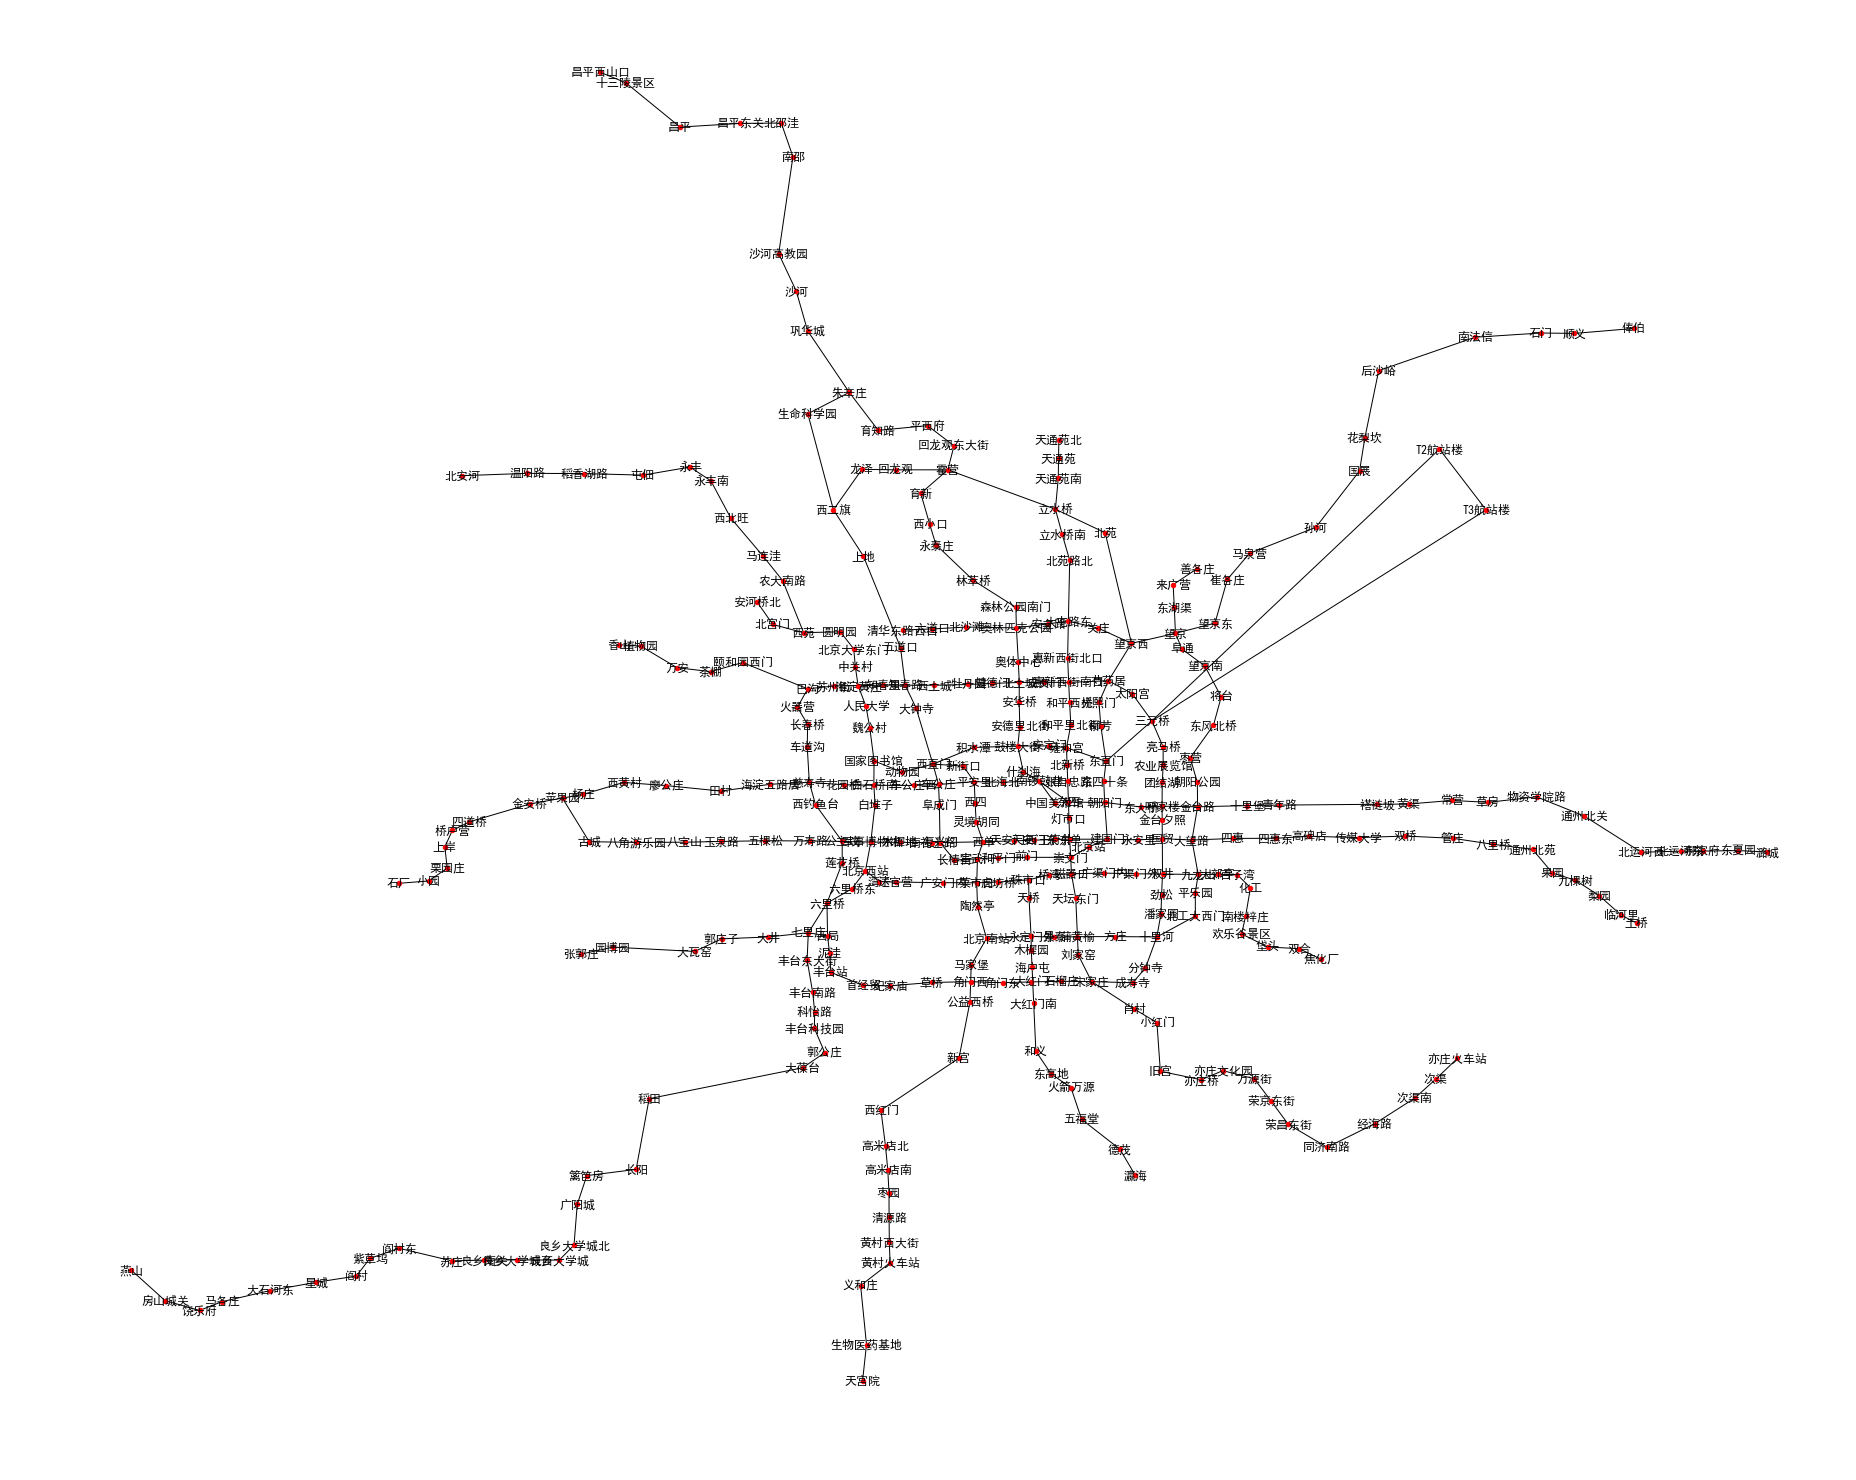

In [72]:
#画出地铁图
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
stations = list(station_geo.keys())
stations_graph = nx.Graph()
stations_graph.add_nodes_from(stations)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(25,20))
nx.draw(nx.Graph(station_connection),station_geo,with_labels = True,node_size = 20,labels_size = 5)

In [93]:
def search1(start,destination):
    pathes = [[start]]
    visited  = set()
    while pathes:
        path = pathes.pop(0)
        front = path[-1]
        next_ = station_connection[front]
        
        for station in next_:
            if station in visited:continue
            else:
                new_path = path + [station]
                pathes.append(new_path)
                if station == destination:return new_path
                visited.add(front)
def pretty_print(w):
    print('->'.join(w))
pretty_print(search1('西直门','东直门'))

西直门->积水潭->鼓楼大街->安定门->雍和宫->东直门


In [99]:
def search(start,destination,sort):
    pathes = [[start]]
    visited = set()
    while pathes:
        path = pathes.pop(0)
        front = path[-1]
        if front in visited:continue
        successor = station_connection[front]
        for station in successor:
            if station in path:continue
            new_path = path + [station]
            pathes.append(new_path)
            if station == destination:return new_path
        visited.add(front)
        pathes = sort(pathes)

def transfer_stations_first(pathes):
    return sorted(pathes,key = len,reverse = True)


In [100]:
pretty_print(search('东直门','望京',sort = transfer_stations_first))

东直门->雍和宫->安定门->鼓楼大街->什刹海->南锣鼓巷->北海北->平安里->新街口->西直门->动物园->国家图书馆->魏公村->人民大学->海淀黄庄->知春里->知春路->西土城->牡丹园->健德门->北土城->奥体中心->奥林匹克公园->安立路->大屯路东->关庄->望京西->望京


In [101]:
pretty_print(search1('东直门','望京'))

东直门->雍和宫->和平里北街->和平西桥->惠新西街南口->芍药居->望京西->望京
